In [30]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, shapiro

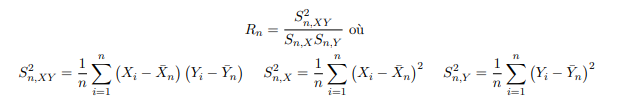

In [31]:
def calculate_R(X, Y):
  return calculate_S(X, Y)/np.sqrt((calculate_S(X, X)*calculate_S(Y, Y)))

def calculate_S(X, Y):
  """
    X, Y -> S_n^2 de XY, X peut-être égal à Y
    X et Y doivent avoir le mẽme format
  """
  mean_x = calculate_mean(X)
  mean_y = calculate_mean(Y)
  sum = 0
  for index, element in enumerate(X):
    sum+= (X[index]-mean_x)*(Y[index]-mean_y)

  return sum/len(X)


def calculate_mean(X):
  return np.mean(X)

In [32]:
def plot_histogram(X, rho):
  plt.figure()
  counts, bins = np.histogram(X, bins=80)
  plt.hist(bins[:-1], bins, weights=counts, density=True)
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, 0, (1-rho**2)**2)
    
  plt.plot(x, p, 'k', linewidth=2)
  title = "histogram"
  plt.title(title)
  plt.show()

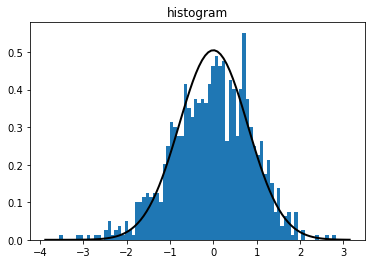

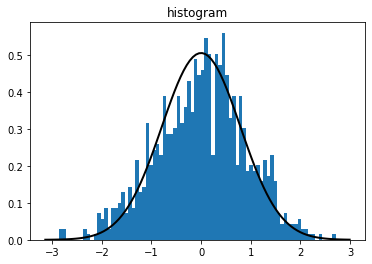

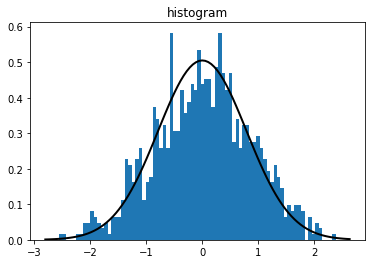

In [33]:
mean = np.array([0, 0])
rho = 1/3
cov = np.array([[1, rho], [rho, 1]])
N = 1000
multivariate =  np.random.multivariate_normal(mean, cov, N)
x1 = np.zeros(1000)
x2 = np.zeros(1000)
x3 = np.zeros(1000)
for i in range(1000):
    n=100
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    x1[i] = np.sqrt(n)*(calculate_R(multivariate[:, 0], multivariate[:, 1])-rho)
    n=200
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    x2[i] = np.sqrt(n)*(calculate_R(multivariate[:, 0], multivariate[:, 1])-rho)
    n=300
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    x3[i] = np.sqrt(n)*(calculate_R(multivariate[:, 0], multivariate[:, 1])-rho)


plot_histogram(x1, rho)
plot_histogram(x2, rho)
plot_histogram(x3, rho)


In [34]:
def make_boxplot(X, title=""):
  plt.figure()
  labels = ["n=100", "n=200", "n=300"]
  plt.boxplot(X, labels=labels)
  plt.title(title)
  plt.legend()
  plt.show()

def make_qqplot(X, title):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  probplot(X, plot=ax)
  ax.set_title(title)
  plt.show()


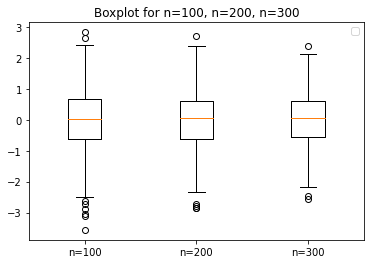

In [35]:
make_boxplot([x1, x2, x3], title="Boxplot for n=100, n=200, n=300")


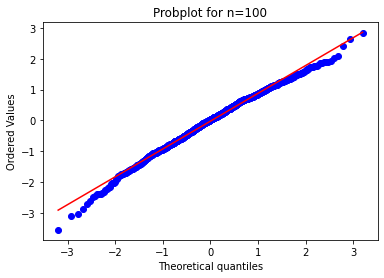

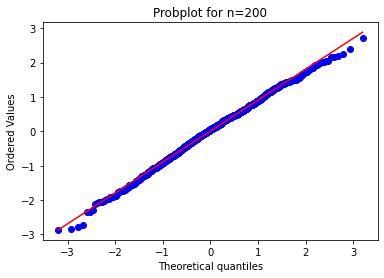

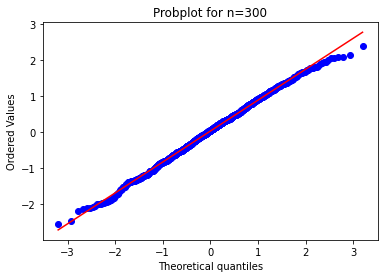

In [36]:
make_qqplot(x1, title="Probplot for n=100")
make_qqplot(x2, title="Probplot for n=200")
make_qqplot(x3, title="Probplot for n=300")

La p-valeur pour n=100: 0.00030445397715084255
La p-valeur pour n=200: 0.09895940870046616
La p-valeur pour n=300: 0.13802604377269745


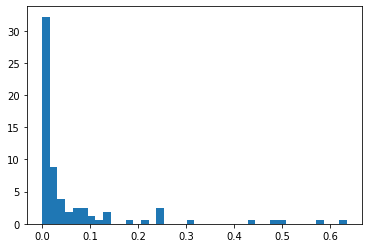

<Figure size 432x288 with 0 Axes>

In [37]:
N  = 100
p_valeur1 = np.zeros(N)
for j in range(N):
  for i in range(1000):
      n=100
      multivariate =  np.random.multivariate_normal(mean, cov, n)
      x1[i] = np.sqrt(n)*(calculate_R(multivariate[:, 0], multivariate[:, 1])-rho)
  p_valeur1[j] = shapiro(x1)[1]

p_valeur = shapiro(x1)[1]
p_valeur2 = shapiro(x2)[1]
p_valeur3 = shapiro(x3)[1]
print("La p-valeur pour n=100:", p_valeur)
print("La p-valeur pour n=200:", p_valeur2)
print("La p-valeur pour n=300:", p_valeur3)


plt.figure()
counts, bins = np.histogram(p_valeur1, bins=40)
plt.hist(bins[:-1], bins, weights=counts, density=True)
plt.figure()
plt.show()


#Q1 (partie 1)

On a visualisé **ci-dessus** les histogrammes, les bloxplots, les QQ et la p-valeur du test de Shapiro pour :

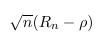

Observations :

* Les histogrammes pour n = 100, 200 et 300 donnent une apparrence de loi normale

* Le QQ-plot pour n = 100 montre une petite déviation de la loi normale et les autres 2 un très bon *matching* 

* La p-valeur pour n = 100 est très petite et suggère rejecter l'hypothèse d'une distribution normale et les autres deux le contraire, surtout avec n = 300.

* De plus, l'histogramme des p-valeurs pour n = 100 avec differentes itérations montre qu'une grosse majorité reste très proche de 0, ce qui reinforce l'idée de rejecter l'hyposthèse nulle pour n petit.

In [38]:
X = np.zeros((1000, 3))

for i in range(1000):
    n=100
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    Rn = calculate_R(multivariate[:, 0], multivariate[:, 1])
    X[i, 0] = np.sqrt(n)/2*(np.log((1+Rn)/(1-Rn)) - np.log((1+rho)/(1-rho)))
    n=200
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    Rn = calculate_R(multivariate[:, 0], multivariate[:, 1])
    X[i, 1] = np.sqrt(n)/2*(np.log((1+Rn)/(1-Rn)) - np.log((1+rho)/(1-rho)))
    n=300
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    Rn = calculate_R(multivariate[:, 0], multivariate[:, 1])
    X[i, 2] = np.sqrt(n)/2*(np.log((1+Rn)/(1-Rn)) - np.log((1+rho)/(1-rho)))

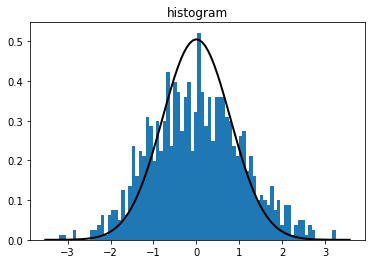

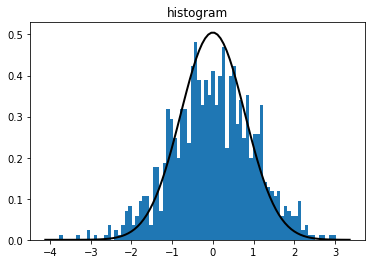

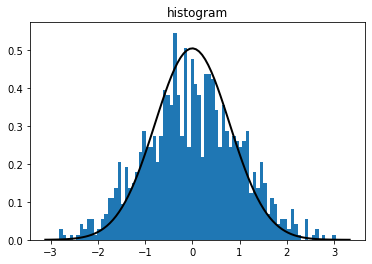

In [39]:
plot_histogram(X[:, 0], rho)
plot_histogram(X[:, 1], rho)
plot_histogram(X[:, 2], rho)

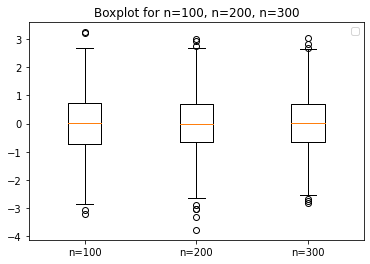

In [40]:
make_boxplot(X, title="Boxplot for n=100, n=200, n=300")

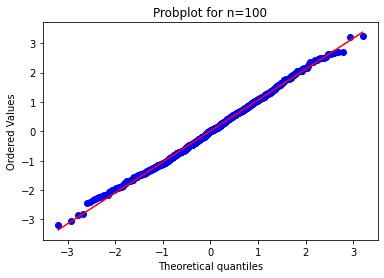

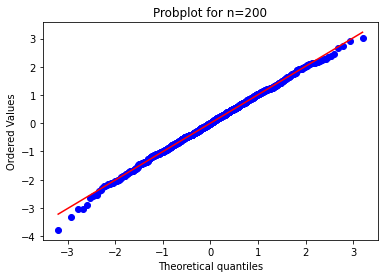

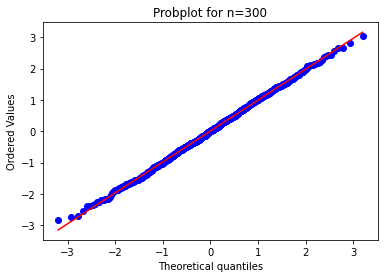

In [41]:
make_qqplot(X[:, 0], title="Probplot for n=100")
make_qqplot(X[:, 1], title="Probplot for n=200")
make_qqplot(X[:, 2], title="Probplot for n=300")

La p-valeur pour n=100: ShapiroResult(statistic=0.997493326663971, pvalue=0.12835311889648438)
La p-valeur pour n=200: ShapiroResult(statistic=0.9986542463302612, pvalue=0.657672643661499)
La p-valeur pour n=300: ShapiroResult(statistic=0.9988664984703064, pvalue=0.7970437407493591)


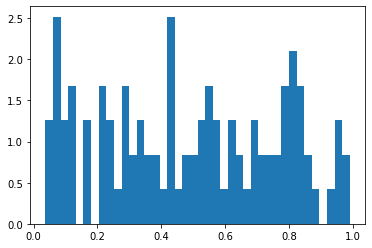

<Figure size 432x288 with 0 Axes>

In [42]:
# Calcule de la p-valeur de Shapiro
N  = 100
p_valeur1 = np.zeros(N)
x1 = np.zeros(1000)
for j in range(N):
  for i in range(1000):
      n=300
      multivariate =  np.random.multivariate_normal(mean, cov, n)
      Rn = calculate_R(multivariate[:, 0], multivariate[:, 1])
      x1[i] = np.sqrt(n)/2*(np.log((1+Rn)/(1-Rn)) - np.log((1+rho)/(1-rho)))
  p_valeur1[j] = shapiro(x1)[1]

p_valeur = shapiro(X[:, 0])
p_valeur2 = shapiro(X[:, 1])
p_valeur3 = shapiro(X[:, 2])
print("La p-valeur pour n=100:", p_valeur)
print("La p-valeur pour n=200:", p_valeur2)
print("La p-valeur pour n=300:", p_valeur3)


plt.figure()
counts, bins = np.histogram(p_valeur1, bins=40)
plt.hist(bins[:-1], bins, weights=counts, density=True)
plt.figure()
plt.show()

#Q1 (partie 2)

On a visualisé **ci-dessus** les histogrammes, les bloxplots, les QQ et la p-valeur du test de Shapiro pour :

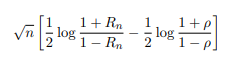

Observations :

* Les histogrammes pour n = 100, 200 et 300 donnent une apparrence de loi normale

* Le QQ-plot pour n=100, 200 et 300 montrent un bon *matching* entre notre variable et une gaussienne.

* La p-valeur n'est pas significative dans les 3 cas (n'est pas petite) ce qui suggére d'accepter l'hypothèse nulle, i.e, que notre variable est bien normalement distribuée.

* De plus, l'histogramme des p-valeurs pour n = 300 avec differentes itérations montre une distribution très equilibré des valeurs entre 0 et 1 et une très petite percentage reste proche de 0. Ça montre que l'hypothèse nulle est effectivement très probable d'être vrai.

[0.22164735329150398, 0.5545916328208624]
[0.210397965647264, 0.541008624195625]


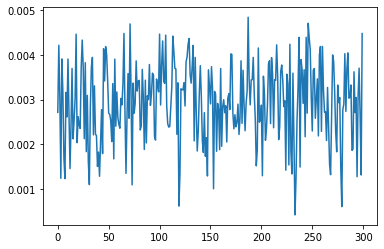

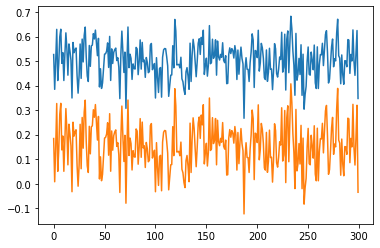

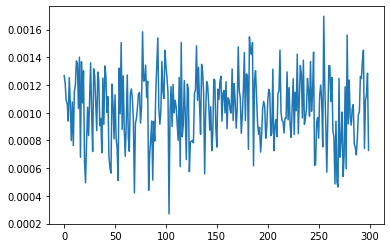

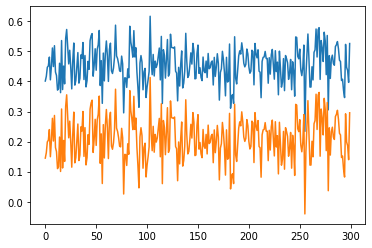

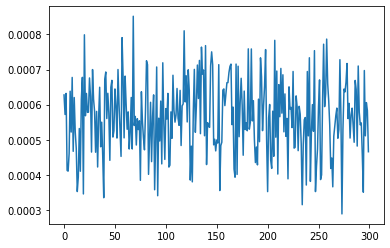

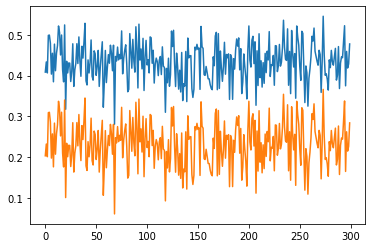

In [43]:
def calculate_interval1(Rn, n, alpha=0.05):
  z = norm.ppf(1-alpha/2)
  a = Rn-((z*(1-Rn**2))/np.sqrt(n))
  b = Rn+((z*(1-Rn**2))/np.sqrt(n))
  return [a, b]

def calculate_interval2(Rn, n, alpha=0.05):
  Wn = np.log((1+Rn)/(1-Rn))/2
  z = norm.ppf(1-alpha/2)
  a = (np.exp(2*(Wn-z/np.sqrt(n)))-1)/(np.exp(2*(Wn-z/np.sqrt(n)))+1)
  b =(np.exp(2*(Wn+z/np.sqrt(n)))-1)/(np.exp(2*(Wn+z/np.sqrt(n)))+1)
  return [a, b]

n=100
multivariate =  np.random.multivariate_normal(mean, cov, n)
Rn = calculate_R(multivariate[:, 0], multivariate[:, 1])
print(calculate_interval1(Rn, 100, alpha=0.05))
print(calculate_interval2(Rn, n, alpha=0.05))
for n in [100, 200, 300]:
  intervals = np.zeros((300, 4))
  for i in range(300):
    multivariate =  np.random.multivariate_normal(mean, cov, n)
    Rn = calculate_R(multivariate[:, 0], multivariate[:, 1])
    intervals[i, 0], intervals[i, 1] = calculate_interval1(Rn, n, alpha=0.05)
    intervals[i, 2], intervals[i, 3] = calculate_interval2(Rn, n, alpha=0.05)
  plt.figure()
  plt.plot((intervals[:, 1] - intervals[:, 0])-(intervals[:, 3] - intervals[:, 2]))
  plt.show()
  plt.figure()
  plt.plot(intervals[:, 1])
  plt.plot(intervals[:, 0])
  plt.show()



#Q.2

Les graphiques 2, 4 et 6 montrent la valeur supérieure (en bleu) et inférieure (en orange) pour plusieurs itérations avec n = 100, 200  et 300 respectivement.
 
Les graphiques 1, 3 et 5 montrent la différence $I_1 - I_2$ aussi en fonction des itérations pour n = 100, 200 et 300 respectivement.
 
On peut faire deux observations importantes à partir de ces graphiques :
* $|I_1 - I_2|$ —> 0 :  à mesure qu'on augmente n la différence entre la taille des intervalles tend vers 0 ce qui est expliqué par le fait que les deux formules sont équivalentes asymptotiquement à la même variable N(0,1), i.e, la taille de chaque intervalle tend vers la taille de l'intervalle de confiance de la loi normal centrée réduite.
 
* $I_1 > I_2$ : dans les trois cas et pour toutes les itérations la taille du premier intervalle a été toujours plus grande ce qui montre que la formule (2) est préférable par rapport à (1).
